In [1]:
from GeneticDE import *

Sympyification failed: 1.0 / exp(x) * sin((exp(exp(7.0 * 6.0)))) / x
0: 2.0/x (30.00000000000011)


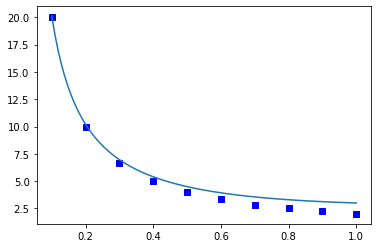

Sympyification failed: 1.0 / exp(x) * sin((exp(exp(7.0 * 6.0)))) - x
2: x + 2.0/x (8.881784197001252e-15)


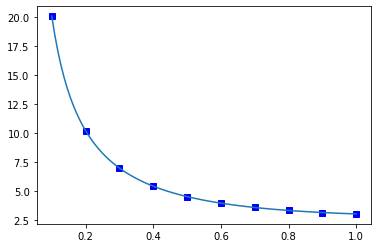

2: x + 2.0/x (8.881784197001252e-15)


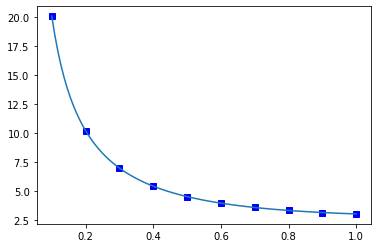

In [2]:
x = sympy.Symbol('x')

de = DifferentialEquation(lambda expr: sympy.diff(expr, x) - (2*x - expr)/x, domain=numpy.linspace(0.1,1.0,num=10))

bc = BoundaryCondition([lambda expr: expr - 20.1], [0.1])

pop = Population(de, bc, popsize=1000, size=50)

old_indi = copy.copy(pop.individuals[0])

counter = 0

print(f'{counter}: {pop.individuals[0].expression} ({pop.individuals[0].fitness})')

nl = numpy.linspace(min(old_indi.de.domain),max(old_indi.de.domain),num=100)
true_sol = lambda x: x + 2/x
plt.plot(old_indi.de.domain, old_indi(old_indi.de.domain), 'bs', nl, true_sol(nl))
plt.show()

while pop.individuals[0].fitness > 10**-5 and counter < 2000:
    
    #print("1")
    totp = pop.individuals + pop.crossover() + pop.mutate()
    #print("2")
    #totnew = []
    #for t in totp:
    #    if t not in totnew:
    #        totnew.append(t)
    totnew = sorted(totp, key=lambda x: x.fitness)
    #print("3")
    
    while len(totnew) < len(pop.individuals):
        indi = Individual(de, bc)
        if indi not in totnew:
            totnew.append(indi)
    #print("4")
    pop = Population(de, bc, indis=totnew[:len(pop.individuals)])
    #print("5")
    counter += 1
    if old_indi != pop.individuals[0]:
        old_indi = copy.copy(pop.individuals[0])
        print(f'{counter}: {pop.individuals[0].expression} ({pop.individuals[0].fitness})')
        
        plt.plot(old_indi.de.domain, old_indi(old_indi.de.domain), 'bs', nl, true_sol(nl))
        plt.show()
        
print(f'{counter}: {pop.individuals[0].expression} ({pop.individuals[0].fitness})')

plt.plot(old_indi.de.domain, old_indi(old_indi.de.domain), 'bs', nl, true_sol(nl))
plt.show()